# 1. Data collection

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("BostonHousing.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.isna().sum()
# no missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## There are no missing values

C:\Users\auray\AppData\Local\Temp\ipykernel_15884\3010895997.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.medv)


<Axes: xlabel='medv', ylabel='Density'>

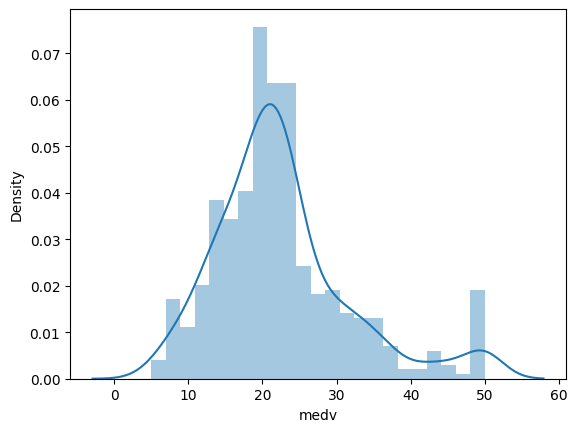

In [12]:
# MEDV is considered as our target variable
# check whether target has a normal (symmetrical distribution or not)

sns.distplot(df.medv)

## Data is symmetrically distributed

## Checking for normal distribution

In [15]:
import scipy.stats as stats

# Function to perform Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column], dist='norm')
    print(f'Anderson-Darling Test for {column}:')
    print(f'Statistic: {result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At {sl}% significance level, the data looks normal (statistic {result.statistic} < critical value {cv}).')
        else:
            print(f'At {sl}% significance level, the data does not look normal (statistic {result.statistic} >= critical value {cv}).')
    print()

# List of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Perform the Anderson-Darling test for each numerical column
for column in numerical_cols:
    anderson_darling_test(df, column)

Anderson-Darling Test for crim:
Statistic: 86.76289903052657
At 15.0% significance level, the data does not look normal (statistic 86.76289903052657 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 86.76289903052657 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 86.76289903052657 >= critical value 0.781).
At 2.5% significance level, the data does not look normal (statistic 86.76289903052657 >= critical value 0.911).
At 1.0% significance level, the data does not look normal (statistic 86.76289903052657 >= critical value 1.084).

Anderson-Darling Test for zn:
Statistic: 98.18234422170497
At 15.0% significance level, the data does not look normal (statistic 98.18234422170497 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 98.18234422170497 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 98.182344221704

## What is Anderson-Darling Test
### ->The Anderson-Darling test is a statistical test used to determine if a given sample of data comes from a specific distribution, most commonly the normal distribution. It is an extension of the Kolmogorov-Smirnov test and provides a more sensitive measure of how well the data follows the hypothesized distribution.¶

### Since the Dataset is not Normally Distributed, therefore we should use IQR instead of Z-score and DBSCAN for outlier detection

## checking for outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

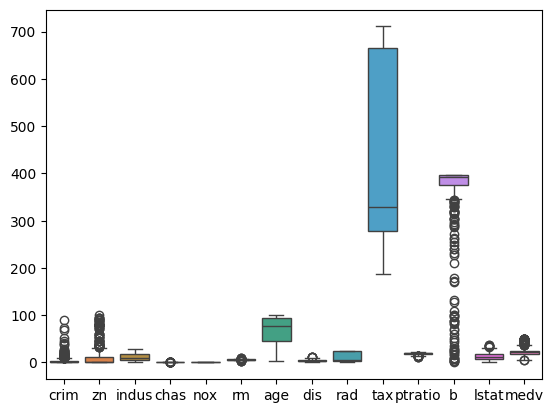

In [16]:
df.isna().sum()/len(df)*100
df.info()

sns.boxplot(df)

## Since there  are many outliers present in the given dataset we will use IQR method to treat them.

In [24]:
# Step 1: Identify numerical columns 
numerical_cols = df.select_dtypes(include=np.number).columns

# Step 2: Define a function to find outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Step 3: Remove outliers from all numerical columns except 'NdsCH'
for column in numerical_cols:
    lower_bound, upper_bound = find_outliers_iqr(df, column)
    data_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display the new dataframe without outliers
print("DataFrame after removing outliers:")
print(df_clean.head())

# Step 4: Verify the total number of rows after outlier removal
print(f"Total number of rows after outlier removal: {len(data_clean)}") 

DataFrame after removing outliers:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Total number of rows after outlier removal: 466


#### Why IQR is used in Outlier Detection

##### ->Given your dataset consists of only numerical attributes and you've identified outliers using multiple methods (DBSCAN, IQR, Z-score), here’s why IQR is particularly useful:
##### ->Balance Between Sensitivity and Robustness: The IQR method strikes a good balance between being sensitive enough to detect meaningful outliers and robust enough to avoid flagging too many points as outliers in skewed or non-normal distributions.
##### ->Compatibility with Median Imputation: Since you are replacing outliers with the median, using a method that relies on median and quartiles for outlier detection ensures consistency in your approach.

In [28]:
df.info()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     466 non-null    float64
 1   zn       466 non

### Here total no of outliers is 40, and percentage of outlier is 7.90%

## Descriptive statistics

In [29]:
# Display descriptive statistics
print("Descriptive Statistics:")
print(data_clean.describe())

Descriptive Statistics:
             crim          zn       indus        chas         nox          rm  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean     3.590278   10.580472   11.382446    0.060086    0.556826    6.179633   
std      8.245015   22.177036    6.793901    0.237901    0.117400    0.576325   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.082757    0.000000    5.640000    0.000000    0.453000    5.876250   
50%      0.247510    0.000000    9.900000    0.000000    0.538000    6.163500   
75%      3.755472   12.500000   18.100000    0.000000    0.624000    6.506250   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  466.000000  466.000000  466.000000  466.000000  466.000000  466.000000   
mean    68.666524    3.833586    9.669528  413.105150   18.617382  354.197790   
std

### ->Descriptive statistics are used to summarize and describe the basic features of a dataset. It helps us understand the data by providing key numerical summaries such as measures of central tendency (like mean and median), measures of dispersion (like standard deviation and range), and distribution shape (like quartiles).


## Scaling of data


In [49]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=['medv'])
y = df['medv']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.203706,0.410679,-0.065371,0.422928,-0.199504,0.357666,-0.390521,0.637234,0.592757,0.285594,-0.421034,0.453313,-0.482030
zn,-0.203706,1.000000,-0.536503,-0.055538,-0.513071,0.322274,-0.559513,0.685944,-0.306184,-0.302126,-0.376451,0.176910,-0.425632,0.436177
indus,0.410679,-0.536503,1.000000,0.037869,0.766019,-0.369447,0.646233,-0.729908,0.588879,0.708080,0.366943,-0.359898,0.620535,-0.612220
chas,-0.065371,-0.055538,0.037869,1.000000,0.092005,0.060187,0.077140,-0.086312,-0.033668,-0.067897,-0.120863,0.045013,-0.006830,0.097053
nox,0.422928,-0.513071,0.766019,0.092005,1.000000,-0.308291,0.727998,-0.771634,0.607829,0.665039,0.181092,-0.383398,0.606631,-0.569014
rm,-0.199504,0.322274,-0.369447,0.060187,-0.308291,1.000000,-0.271742,0.270629,-0.161677,-0.230787,-0.223777,0.098115,-0.575358,0.568940
age,0.357666,-0.559513,0.646233,0.077140,0.727998,-0.271742,1.000000,-0.741121,0.452635,0.506743,0.272825,-0.282719,0.650283,-0.557098
dis,-0.390521,0.685944,-0.729908,-0.086312,-0.771634,0.270629,-0.741121,1.000000,-0.496763,-0.545198,-0.260617,0.305245,-0.552922,0.439844
rad,0.637234,-0.306184,0.588879,-0.033668,0.607829,-0.161677,0.452635,-0.496763,1.000000,0.910061,0.450837,-0.452738,0.496024,-0.504338
tax,0.592757,-0.302126,0.708080,-0.067897,0.665039,-0.230787,0.506743,-0.545198,0.910061,1.000000,0.439957,-0.448525,0.546314,-0.590236


<Axes: >

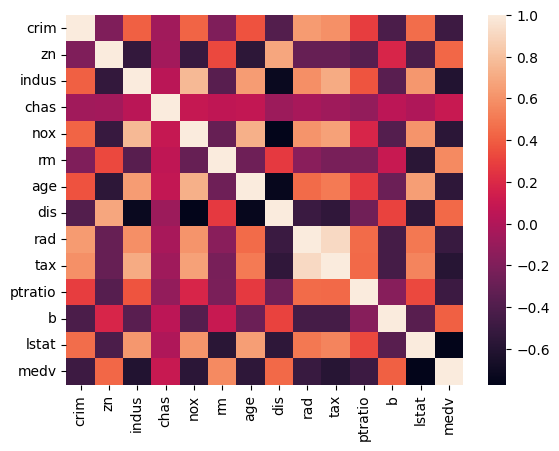

In [31]:
viz_data= data_clean[['crim',	'zn',	'indus',	'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b',	'lstat',	'medv']]

display(viz_data.corr())
sns.heatmap(viz_data.corr())

## Multicollinearity Test

In [34]:
# check for multicollinearity
# Select only numerical columns for correlation matrix
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()

print(correlation_matrix)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.203706  0.410679 -0.065371  0.422928 -0.199504  0.357666   
zn      -0.203706  1.000000 -0.536503 -0.055538 -0.513071  0.322274 -0.559513   
indus    0.410679 -0.536503  1.000000  0.037869  0.766019 -0.369447  0.646233   
chas    -0.065371 -0.055538  0.037869  1.000000  0.092005  0.060187  0.077140   
nox      0.422928 -0.513071  0.766019  0.092005  1.000000 -0.308291  0.727998   
rm      -0.199504  0.322274 -0.369447  0.060187 -0.308291  1.000000 -0.271742   
age      0.357666 -0.559513  0.646233  0.077140  0.727998 -0.271742  1.000000   
dis     -0.390521  0.685944 -0.729908 -0.086312 -0.771634  0.270629 -0.741121   
rad      0.637234 -0.306184  0.588879 -0.033668  0.607829 -0.161677  0.452635   
tax      0.592757 -0.302126  0.708080 -0.067897  0.665039 -0.230787  0.506743   
ptratio  0.285594 -0.376451  0.366943 -0.120863  0.181092 -0.223777  0.272825   
b       -0.421034  0.176910 

## Multicollinearity refers to the phenomenon where two or more predictor variables in a regression model are highly correlated with each other. It can lead to issues in the regression analysis, primarily affecting the interpretation of individual predictor variables.
### All correlation values are below 0.9, indicating no significant multicolinearity amog attributes hence no need to remove anything

In [37]:
df_new = data_clean

### Splitting of the dataset as per 80% training and 20% testing.

In [51]:
X_scaled = df_new .drop('medv',axis =1)
y = df_new['medv']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=100)

### MEDV is considered as our target variable

### Here I took random state of 100

## 1.Ridge Regression

#### Ridge regression is used because:
##### ->Improving the stability and generalization of regression models.
##### ->Offering a solution to overfitting by shrinking the coefficients towards zero
##### ->ridge regression addresses the trade-off between bias and variance by slightly increasing bias 

## Multiple Linear Regression:

##### ->Used for assumption of Linearity and Independence
##### ->Modeling Relationships Between Several Variables
##### ->Used when Predicting a Continuous Dependent Variable

In [52]:
from sklearn.linear_model import LinearRegression

# model fitting
lm = LinearRegression()
lm.fit(X_train,y_train)

#predict the outcomes
y_pred = lm.predict(X_test)

coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
display(coefficients)

print("intercept is {}".format(lm.intercept_))

,coefficients
crim,-0.094062
zn,0.032401
indus,-0.060445
chas,1.318181
nox,-10.681435
rm,1.490168
age,-0.018991
dis,-1.013634
rad,0.201863
tax,-0.011459


intercept is 42.516919800917705


In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the model performance metrics
print(f"R²: {r2}")
print(f"Adjusted R²: {adjusted_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


R²: 0.7923366515028876
Adjusted R²: 0.7585913573721068
Mean Absolute Error (MAE): 2.3660627138131916
Mean Squared Error (MSE): 8.379652308298969


#### Observation:
#### R² (Coefficient of Determination): 0.7923
##### ->his indicates that approximately 79.23% of the variance in the dependent variable is explained by the independent variables in the model. This is a substantial proportion, showing a strong fit to the data.
#### Adjusted R²: 0.7585
##### ->This value is adjusted for the number of predictors in the model and is slightly lower than R², indicating that not all independent variables significantly contribute to the model. It provides a more conservative estimate of the model's explanatory power, accounting for the complexity of the model.
#### Mean Absolute Error (MAE): 2.366
##### ->On average, the model's predictions are 2.366 units away from the actual values, showing the average magnitude of errors in the predictions. A lower MAE indicates better predictive accuracy, suggesting that the model's predictions are generally close to the actual values.
#### Mean Squared Error (MSE): 8.379
##### ->The Mean Squared Error (MSE) for the model is 8.379. MSE quantifies the average squared difference between predicted values and actual values. A lower MSE indicates that, on average, the model's predictions are closer to the actual values, demonstrating effective predictive accuracy in minimizing errors.

#### These metrics suggest that the model explains a substantial proportion of the variance (R² and Adjusted R²) and has a relatively low average error (MAE) and squared error (MSE), indicating strong predictive accuracy. While the fit is good, there may still be room for improvement in prediction accuracy and further reduction in errors.

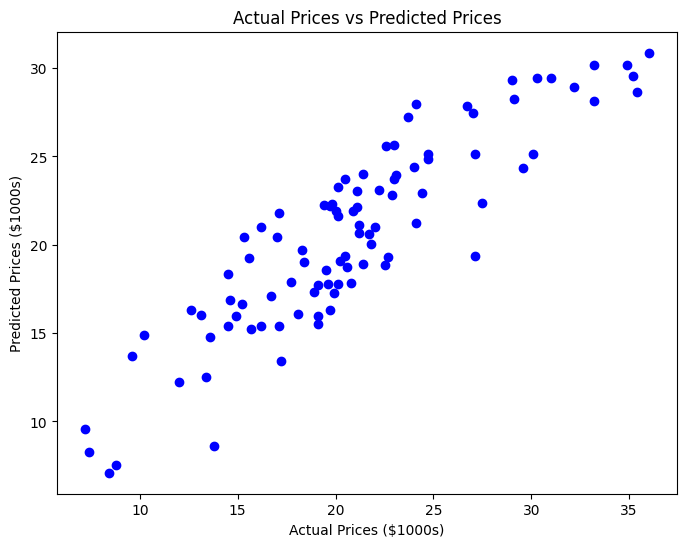

In [54]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [55]:
# Coefficients and their corresponding features
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_})
print(coef_df)

    Feature  Coefficient
0      crim    -0.094062
1        zn     0.032401
2     indus    -0.060445
3      chas     1.318181
4       nox   -10.681435
5        rm     1.490168
6       age    -0.018991
7       dis    -1.013634
8       rad     0.201863
9       tax    -0.011459
10  ptratio    -0.711411
11        b     0.005780
12    lstat    -0.402821


## comments


### CRIM (Per capita crime rate by town):
#### Coefficient: -0.094
#### Comment: A higher per capita crime rate is associated with slightly lower predicted housing prices. This suggests that crime rate has a modest negative impact on housing prices.

#### ZN (Proportion of residential land zoned for large lots):
#### Coefficient: 0.032
#### Comment: Areas with a higher proportion of residential land zoned for large lots tend to have slightly higher predicted housing prices. Larger lots may be perceived as more desirable.

#### INDUS (Proportion of non-retail business acres per town):
#### Coefficient: -0.060
#### Comment: Towns with a higher proportion of non-retail business acres tend to have slightly lower predicted housing prices. Industrial areas may reduce residential desirability.

#### CHAS (Charles River dummy variable):
#### Coefficient: 1.318
#### Comment: Towns bordering the Charles River tend to have significantly higher predicted housing prices compared to those that do not. Proximity to water bodies often increases property values.

#### NOX (Nitric oxides concentration):
#### Coefficient: -10.681
#### Comment: Higher concentrations of nitric oxides are strongly associated with lower predicted housing prices. Air pollution negatively impacts property values.

#### RM (Average number of rooms per dwelling):
#### Coefficient: 1.490
#### Comment: As the average number of rooms per dwelling increases, predicted housing prices tend to increase significantly. Larger houses command higher prices.

#### AGE (Proportion of owner-occupied units built prior to 1940):
#### Coefficient: -0.018
#### Comment: Older housing stock (built before 1940) has a slight negative impact on predicted housing prices. Buyers may prefer newer or renovated homes.

#### DIS (Weighted distances to five Boston employment centers):
#### Coefficient: -1.013
#### Comment: Increasing distance to employment centers is associated with lower predicted housing prices. Proximity to jobs is often valued by homebuyers.

#### RAD (Index of accessibility to radial highways):
#### Coefficient: 0.201
#### Comment: Towns with better access to radial highways tend to have slightly higher predicted housing prices. Easy commuting is a desirable feature.

#### TAX (Full-value property tax rate per $10,000):
#### Coefficient: -0.011
#### Comment: Higher property tax rates are associated with slightly lower predicted housing prices. High taxes can reduce affordability and attractiveness.

#### PTRATIO (Pupil-teacher ratio by town):
#### Coefficient: -0.711
#### Comment: Higher pupil-teacher ratios are associated with lower predicted housing prices. A lower ratio often indicates better school resources, which is valued by families.

#### B (Proportion of blacks by town):
#### Coefficient: 0.005
#### Comment: The proportion of blacks has a very small positive impact on predicted housing prices. This suggests that racial composition has minimal influence on property values in this model.

#### LSTAT (Percentage of lower status population):
#### Coefficient: -0.402
#### Comment: Higher percentages of lower status population are associated with lower predicted housing prices. Areas with higher poverty rates may have lower property values.